In [12]:
# Mnist dataset using SVM
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
digits = datasets.load_digits()

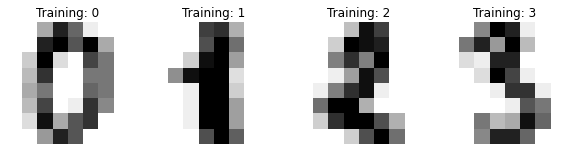

In [13]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [14]:
# Reshape image
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
labels = digits.target

In [15]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(data,labels, test_size=0.2, random_state=42)

In [16]:
# Creating classifier
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

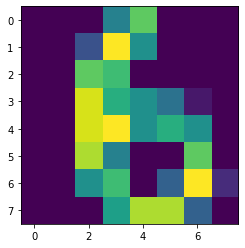

In [17]:
plt.imshow(x_test[0].reshape((8,8)))

In [18]:
predicted = clf.predict(x_test)

In [19]:
clf.predict(x_test[0].reshape(1, -1)) # Reshape cause transformed data is in single array or 1d array of 64 size

array([6])

In [20]:
# Classification Report
print(f"Classification report fot classifier {clf}:\n"f"{metrics.classification_report(y_test,predicted)}\n")

Classification report fot classifier SVC():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360




Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


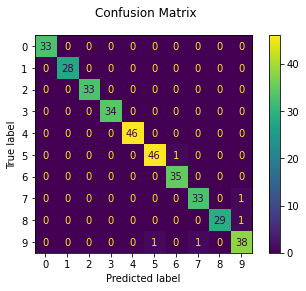

In [21]:
disp = metrics.plot_confusion_matrix(clf,x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion Matrix:\n{disp.confusion_matrix}")
plt.show()